In [1]:
#improting all the required packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#print (df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:97: UserWarning:

Looks like you don't have 'read-write' permission to your 'home' ('~') directory or to our '~/.plotly' directory. That means plotly's python api can't setup local configuration files. No problem though! You'll just have to sign-in using 'plotly.plotly.sign_in()'. For help with that: 'help(plotly.plotly.sign_in)'.
Questions? Visit community.plot.ly or upgrade to a Pro plan for 1-1 help: https://goo.gl/1YUVu9



In [2]:
#function to read large CSV files in chunks
def readCSVFile(fileName):
    df = pd.read_csv(fileName, encoding = 'ISO-8859-1')
    return df

In [3]:
#defining the file-directory
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [4]:
#reading data from ~/data/vehicle_collisions.csv
csvName = fileDir+'\\CleanedData\\LoanData.csv'
dfLoans = readCSVFile(csvName)
dfLoans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_binary,issue_month,issue_year,cr_line_history,cat_loan_amnt,cat_annual_inc
0,5000.0,5000.0,5000.0,36,10.49,162.49,B,B2,driver,10,...,47169.0,23339.0,13600.0,33569.0,0,12,2016,26,0,3
1,3600.0,3600.0,3600.0,36,11.39,118.53,B,B3,IT Specialist 6,10,...,68290.0,45497.0,35400.0,14290.0,0,12,2016,22,0,3
2,7000.0,7000.0,7000.0,36,5.32,210.81,A,A1,Nurse,2,...,73420.0,42606.0,18700.0,40120.0,0,12,2016,24,0,3
3,19200.0,19200.0,19200.0,36,13.99,656.12,C,C3,Foreman,10,...,277588.0,24788.0,15300.0,16273.0,0,12,2016,13,3,3
4,6000.0,6000.0,6000.0,36,7.49,186.61,A,A4,Empty Multi-level Distribution Supv,5,...,70949.0,45718.0,23900.0,39549.0,0,12,2016,13,0,2


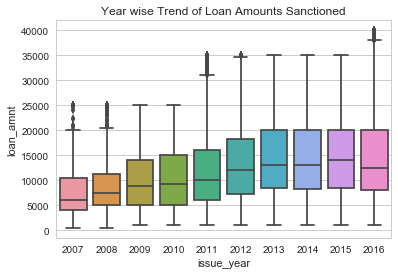

In [5]:
#Box plot analysis for Year wise Total Loan amount
sns.set_style("whitegrid")
ax = sns.boxplot(x="issue_year", y="loan_amnt",data=dfLoans)
fig = plt.figure()
ax.set_title("Year wise Trend of Loan Amounts Sanctioned")

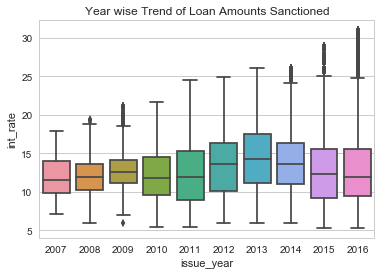

In [6]:
#Box plot analysis for Year wise Interest rate
sns.set_style("whitegrid")
ax = sns.boxplot(x="issue_year", y="int_rate",data=dfLoans)
fig = plt.figure()
ax.set_title("Year wise Trend of Loan Amounts Sanctioned")

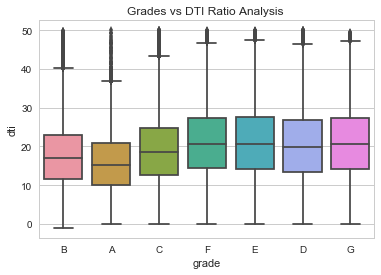

In [7]:
#Grades VS DTI
#Box plot analysis for Year wise Total Loan amount
sns.set_style("whitegrid")
ax = sns.boxplot(x="grade", y="dti",data=dfLoans[dfLoans['dti'] <50])
fig = plt.figure()
ax.set_title("Grades vs DTI Ratio Analysis ")

In [8]:
nNoLate = len(dfLoans[dfLoans['loan_status_binary'] == 1])
nLate = len(dfLoans[dfLoans['loan_status_binary'] == 0])
print(nLate)
print(nNoLate)
dfLoans.head()

1287641
34206


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_binary,issue_month,issue_year,cr_line_history,cat_loan_amnt,cat_annual_inc
0,5000.0,5000.0,5000.0,36,10.49,162.49,B,B2,driver,10,...,47169.0,23339.0,13600.0,33569.0,0,12,2016,26,0,3
1,3600.0,3600.0,3600.0,36,11.39,118.53,B,B3,IT Specialist 6,10,...,68290.0,45497.0,35400.0,14290.0,0,12,2016,22,0,3
2,7000.0,7000.0,7000.0,36,5.32,210.81,A,A1,Nurse,2,...,73420.0,42606.0,18700.0,40120.0,0,12,2016,24,0,3
3,19200.0,19200.0,19200.0,36,13.99,656.12,C,C3,Foreman,10,...,277588.0,24788.0,15300.0,16273.0,0,12,2016,13,3,3
4,6000.0,6000.0,6000.0,36,7.49,186.61,A,A4,Empty Multi-level Distribution Supv,5,...,70949.0,45718.0,23900.0,39549.0,0,12,2016,13,0,2


# The best graded loans (A & B) has a higher percentage of loans with no default

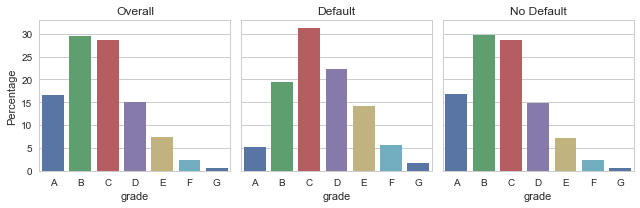

In [9]:
nNoLate = len(dfLoans[dfLoans['loan_status_binary'] == 1])
nLate = len(dfLoans[dfLoans['loan_status_binary'] == 0])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='grade', y='loan_amnt', data=dfLoans, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, order=sorted(dfLoans['grade'].unique()), palette='deep')
sns.barplot(x='grade', y='loan_amnt', data=dfLoans[dfLoans['loan_status_binary'] == 1], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, order=sorted(dfLoans['grade'].unique()), palette='deep')
sns.barplot(x='grade', y='loan_amnt', data=dfLoans[dfLoans['loan_status_binary'] == 0], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, order=sorted(dfLoans['grade'].unique()), palette='deep')

ax1.set_title('Overall')
ax2.set_title('Default')
ax3.set_title('No Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

# The longer term loans (60 months) make up a higher percentage of the defaults than the non defaulting loans.

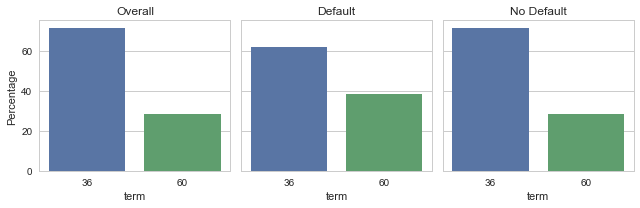

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

sns.barplot(x='term', y='loan_amnt', data=dfLoans, 
            estimator=lambda x: len(x) / (nLate + nNoLate) * 100,
            ax=ax1, order=sorted(dfLoans['term'].unique()), palette='deep')
sns.barplot(x='term', y='loan_amnt', data=dfLoans[dfLoans['loan_status_binary'] == 1], 
            estimator=lambda x: len(x) / nNoLate * 100,
            ax=ax2, order=sorted(dfLoans['term'].unique()), palette='deep')
sns.barplot(x='term', y='loan_amnt', data=dfLoans[dfLoans['loan_status_binary'] == 0], 
            estimator=lambda x: len(x) / nLate * 100,
            ax=ax3, order=sorted(dfLoans['term'].unique()), palette='deep')

ax1.set_title('Overall')
ax2.set_title('Default')
ax3.set_title('No Default')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

# The defaulting loans have a higher interest rate than non defaulting loans

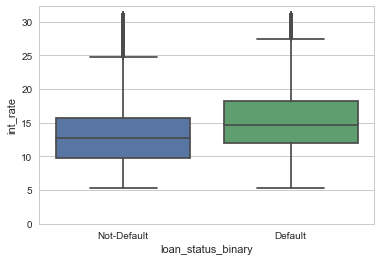

In [11]:
df = dfLoans.copy()
df['loan_status_binary'] = np.where(df['loan_status_binary'] == 1, 'Default', 'Not-Default')
ax1 = sns.boxplot(x='loan_status_binary', y='int_rate', data=df)
ax1.set_ybound(lower=0)
plt.show()

# Defaulting loans still have a higher interest rate than non defaulting loans for most of the grades

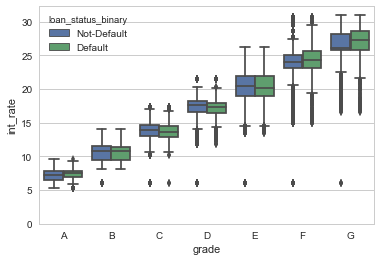

In [12]:
ax1 = sns.boxplot(x='grade', y='int_rate', data=df, hue='loan_status_binary', 
                     order=sorted(df['grade'].unique()))
ax1.set_ybound(lower=0)
plt.show()

# Defaulting loans have a higher DTI

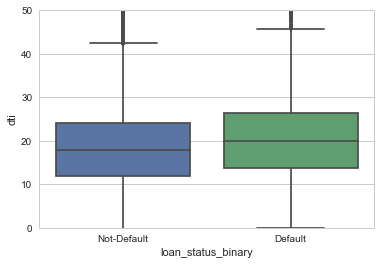

In [25]:
ax1 = sns.boxplot(x='loan_status_binary', y='dti', data=df)
ax1.set_ybound(lower=0, upper=50)
plt.show()

In [14]:
#Summary by Year
#by year and counting the total amount of accepted loans and Interest Rate
seriesCount = dfLoans['loan_amnt'].groupby(dfLoans['issue_year']).count()

#by year and Average of Interest Rate
seriesInterest = dfLoans['int_rate'].groupby(dfLoans['issue_year']).mean()

#by year and Average of Loan Amount
seriesLA = dfLoans['loan_amnt'].groupby(dfLoans['issue_year']).mean()

#by year and mode of term
seriesTerm = dfLoans['term'].groupby(dfLoans['issue_year']).agg(lambda x: x.value_counts().index[0])

#by year and mode of grade
seriesGrade = dfLoans['grade'].groupby(dfLoans['issue_year']).agg(lambda x: x.value_counts().index[0])

#by year and avg of emp_length
seriesEL = dfLoans['emp_length'].groupby(dfLoans['issue_year']).mean()

#combining seriesCount and seriesTotAmt into summary Metrix data frame
columns=['issue_year', 'Accepted Loans', 'Avg Interest Charged', 'Avg Loan Amount', 'Most Likely Term', 'Most Likely Grade', 'Avg EMP Length']
dfSummary = pd.DataFrame({'issue_year':seriesCount.index,'Accepted Loans': seriesCount,'Avg Interest Charged':seriesInterest, 
                          'Avg Loan Amount':seriesLA, 'Most Likely Term':seriesTerm, 'Most Likely Grade':seriesGrade, 'Avg EMP Length':seriesEL})

dfSummary[columns].head()

,issue_year,Accepted Loans,Avg Interest Charged,Avg Loan Amount,Most Likely Term,Most Likely Grade,Avg EMP Length
issue_year,,,,,,,
2007,2007,603,11.825108,8254.519071,36,C,3.109453
2008,2008,2393,12.061964,8825.428333,36,B,4.326786
2009,2009,5281,12.437247,9833.033516,36,B,4.238023
2010,2010,12537,11.985268,10528.240408,36,B,4.884342
2011,2011,21721,12.223365,12047.503568,36,B,5.209060


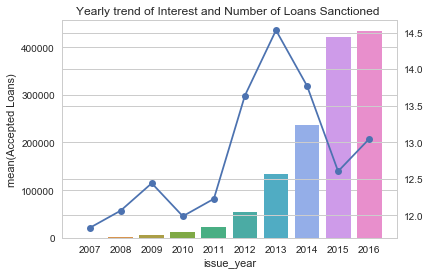

In [15]:
#Summary Chart for Year Wise Accepted Data and Approved Loans
sns.set_style("whitegrid")
ax = sns.barplot("issue_year", y="Accepted Loans", data=dfSummary)
plt.xticks(rotation = 0)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), dfSummary['Avg Interest Charged'], marker = 'o')
ax.set_title("Yearly trend of Interest and Number of Loans Sanctioned ")
ax

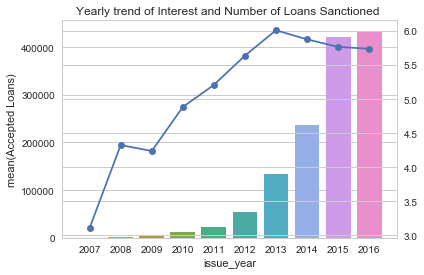

In [16]:
#Summary Chart for Year Wise Accepted Data and Emp_Length
sns.set_style("whitegrid")
ax = sns.barplot("issue_year", y="Accepted Loans", data=dfSummary)
plt.xticks(rotation = 0)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), dfSummary['Avg EMP Length'], marker = 'o')
ax.set_title("Yearly trend of Interest and Number of Loans Sanctioned ")
ax

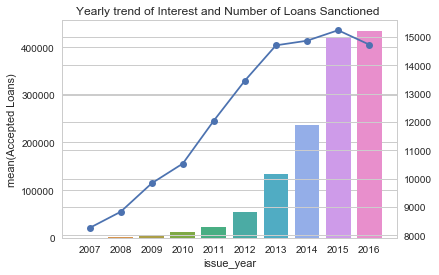

In [17]:
#Summary Chart for Year Wise Accepted Data and Amt_requsted
sns.set_style("whitegrid")
ax = sns.barplot("issue_year", y="Accepted Loans", data=dfSummary)
plt.xticks(rotation = 0)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), dfSummary['Avg Loan Amount'], marker = 'o')
ax.set_title("Yearly trend of Interest and Number of Loans Sanctioned ")
ax

In [18]:
df = dfLoans.copy()
df['loan_status_binary'] = np.where(df['loan_status_binary'] == 1, 'Default', 'Not-Default')
df1 = df[df['loan_status_binary'] == 'Not-Default']
df2 = df[df['loan_status_binary'] == 'Default']

In [19]:
#Summary by state for Good loans
#by year and counting the total amount of accepted loans and Interest Rate
seriesCount = df1['loan_amnt'].groupby(df1['addr_state']).count()

#by year and Average of Interest Rate
seriesInterest = df1['int_rate'].groupby(df1['addr_state']).mean()

#by year and Average of Loan Amount
seriesLA = df1['loan_amnt'].groupby(df1['addr_state']).mean()

#by year and mode of term
seriesTerm = df1['term'].groupby(df1['addr_state']).agg(lambda x: x.value_counts().index[0])

#by year and mode of grade
seriesGrade = df1['grade'].groupby(df1['addr_state']).agg(lambda x: x.value_counts().index[0])

#by year and avg of emp_length
seriesEL = df1['emp_length'].groupby(df1['addr_state']).mean()

#combining seriesCount and seriesTotAmt into summary Metrix data frame
columns=['State', 'Accepted Loans', 'Avg Interest Charged', 'Avg Loan Amount', 'Most Likely Term', 'Most Likely Grade', 'Avg EMP Length']
dfSummary = pd.DataFrame({'State':seriesCount.index,'Accepted Loans': seriesCount,'Avg Interest Charged':seriesInterest, 
                          'Avg Loan Amount':seriesLA, 'Most Likely Term':seriesTerm, 'Most Likely Grade':seriesGrade, 'Avg EMP Length':seriesEL})


In [20]:
for col in dfSummary.columns:
    dfSummary[col] = dfSummary[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]    

dfSummary['text'] = dfSummary['State'] + '<br>' +\
    'Avg Loan Amount ($ USD): '+dfSummary['Avg Loan Amount']+'<br>'+\
    'Number of loans: '+dfSummary['Accepted Loans']+'<br>'+\
    'Most Likely Term: '+dfSummary['Most Likely Term']+'<br>'+\
    'Most Likely Grade: '+dfSummary['Most Likely Grade']+'<br>'+\
    'Avg EMP Length: '+dfSummary['Avg EMP Length']

data = [ dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = dfSummary['State'],
    z = dfSummary['Accepted Loans'], 
    locationmode = 'USA-states',
    text = dfSummary['text'],
    marker = dict(
        line = dict (
            color = 'rgb(255,255,255)',
            width = 2
        ) ),
    colorbar = dict(
        title = "Number of loans")
    ) ]

layout = dict(
    title = 'Total number of good-loans by state <br> (Hover over state for other metrics)',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
         )

fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map')

In [21]:
#Summary by state for Default loans
#by year and counting the total amount of accepted loans and Interest Rate
seriesCount = df2['loan_amnt'].groupby(df2['addr_state']).count()

#by year and Average of Interest Rate
seriesInterest = df2['int_rate'].groupby(df2['addr_state']).mean()

#by year and Average of Loan Amount
seriesLA = df2['loan_amnt'].groupby(df2['addr_state']).mean()

#by year and mode of term
seriesTerm = df2['term'].groupby(df2['addr_state']).agg(lambda x: x.value_counts().index[0])

#by year and mode of grade
seriesGrade = df2['grade'].groupby(df2['addr_state']).agg(lambda x: x.value_counts().index[0])

#by year and avg of emp_length
seriesEL = df2['emp_length'].groupby(df2['addr_state']).mean()

#combining seriesCount and seriesTotAmt into summary Metrix data frame
columns=['State', 'Accepted Loans', 'Avg Interest Charged', 'Avg Loan Amount', 'Most Likely Term', 'Most Likely Grade', 'Avg EMP Length']
dfSummary = pd.DataFrame({'State':seriesCount.index,'Accepted Loans': seriesCount,'Avg Interest Charged':seriesInterest, 
                          'Avg Loan Amount':seriesLA, 'Most Likely Term':seriesTerm, 'Most Likely Grade':seriesGrade, 'Avg EMP Length':seriesEL})


In [22]:
for col in dfSummary.columns:
    dfSummary[col] = dfSummary[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]    

dfSummary['text'] = dfSummary['State'] + '<br>' +\
    'Avg Loan Amount ($ USD): '+dfSummary['Avg Loan Amount']+'<br>'+\
    'Number of loans: '+dfSummary['Accepted Loans']+'<br>'+\
    'Most Likely Term: '+dfSummary['Most Likely Term']+'<br>'+\
    'Most Likely Grade: '+dfSummary['Most Likely Grade']+'<br>'+\
    'Avg EMP Length: '+dfSummary['Avg EMP Length']

data = [ dict(
    type='choropleth',
    colorscale = scl,
    autocolorscale = False,
    locations = dfSummary['State'],
    z = dfSummary['Accepted Loans'], 
    locationmode = 'USA-states',
    text = dfSummary['text'],
    marker = dict(
        line = dict (
            color = 'rgb(255,255,255)',
            width = 2
        ) ),
    colorbar = dict(
        title = "Number of loans")
    ) ]

layout = dict(
    title = 'Total number of defaulted-loans by state <br> (Hover over state for other metrics)',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
         )

fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map')

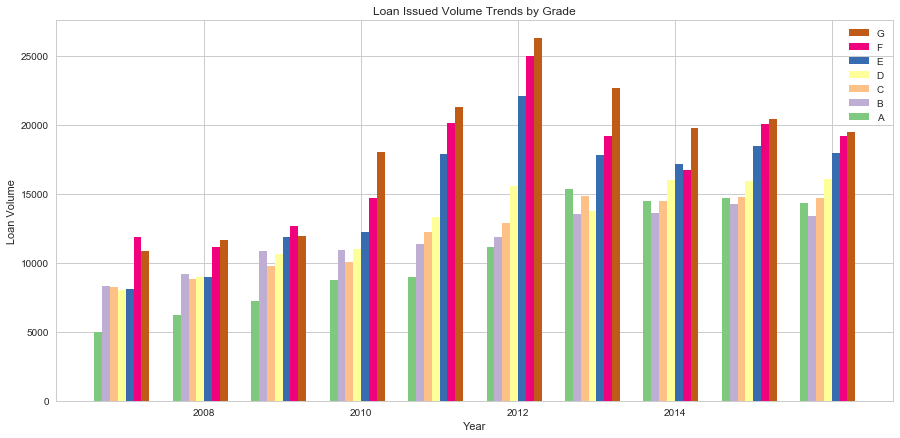

In [23]:
#Grade Wise Analysis of Loan Issued.

temp = dfLoans.groupby(['grade','issue_year'],as_index=False)['loan_amnt'].mean()

import matplotlib.cm as cm
dpoints = np.array(temp)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
space = 0.3
conditions = np.unique(dpoints[:,0])
categories = np.unique(dpoints[:,1])
n = len(conditions)
width = (1-space)/len(conditions)

for i,cond in enumerate(conditions):
    vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(categories)+1)]
    ax.bar(pos, vals, width = width,label=cond, 
       color=cm.Accent(float(i) / n))
    ax.set_xticklabels(['','2008','2010','2012','2014',''])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    ax.set_ylabel("Loan Volume")
    ax.set_xlabel("Year")
plt.title('Loan Issued Volume Trends by Grade')

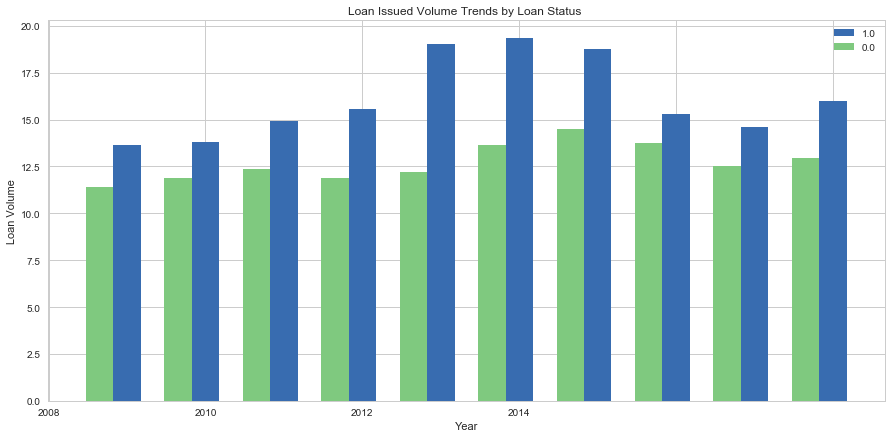

In [24]:
#Grade Wise Analysis of Loan Issued.
temp = dfLoans.groupby(['loan_status_binary','issue_year'],as_index=False)['int_rate'].mean()

import matplotlib.cm as cm
dpoints = np.array(temp)
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
space = 0.3
conditions = np.unique(dpoints[:,0])
categories = np.unique(dpoints[:,1])
n = len(conditions)
width = (1-space)/len(conditions)

for i,cond in enumerate(conditions):
    vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(categories)+1)]
    ax.bar(pos, vals, width = width,label=cond, 
       color=cm.Accent(float(i) / n))
    ax.set_xticklabels(['','2008','2010','2012','2014',''])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    ax.set_ylabel("Loan Volume")
    ax.set_xlabel("Year")
plt.title('Loan Issued Volume Trends by Loan Status ')